<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 141.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 168.1 MB/s eta 0:00:00


In [2]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 114.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 122.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 136.6 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-03-11 13:58:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
connected. to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... 
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  36.3MB/s    in 4.5s    

2025-03-11 13:58:17 (33.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



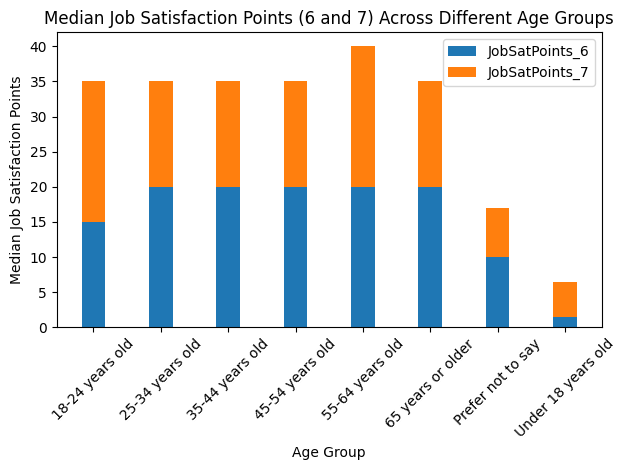

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the SQL query to select relevant data
query = """
SELECT Age, JobSatPoints_6, JobSatPoints_7
FROM main

"""

# Execute the SQL query and load the results into a DataFrame
df_AgeGroups = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Calculate the median JobSatPoints_6 and JobSatPoints_7 for each age group
median_values = df_AgeGroups.groupby('Age').median()

# Create a DataFrame for visualization
median_values.reset_index(inplace=True)

# Create the stacked bar chart
fig, ax = plt.subplots()

bar_width = 0.35

# Stacked bars
ax.bar(median_values['Age'], median_values['JobSatPoints_6'], bar_width, label='JobSatPoints_6')
ax.bar(median_values['Age'], median_values['JobSatPoints_7'], bar_width, bottom=median_values['JobSatPoints_6'], label='JobSatPoints_7')

# Add labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Median Job Satisfaction Points')
ax.set_title('Median Job Satisfaction Points (6 and 7) Across Different Age Groups')

# Add legend
ax.legend()

# Show the plot
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout for better fit
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_299/1525447300.py:51: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # Adjust layout for better fit


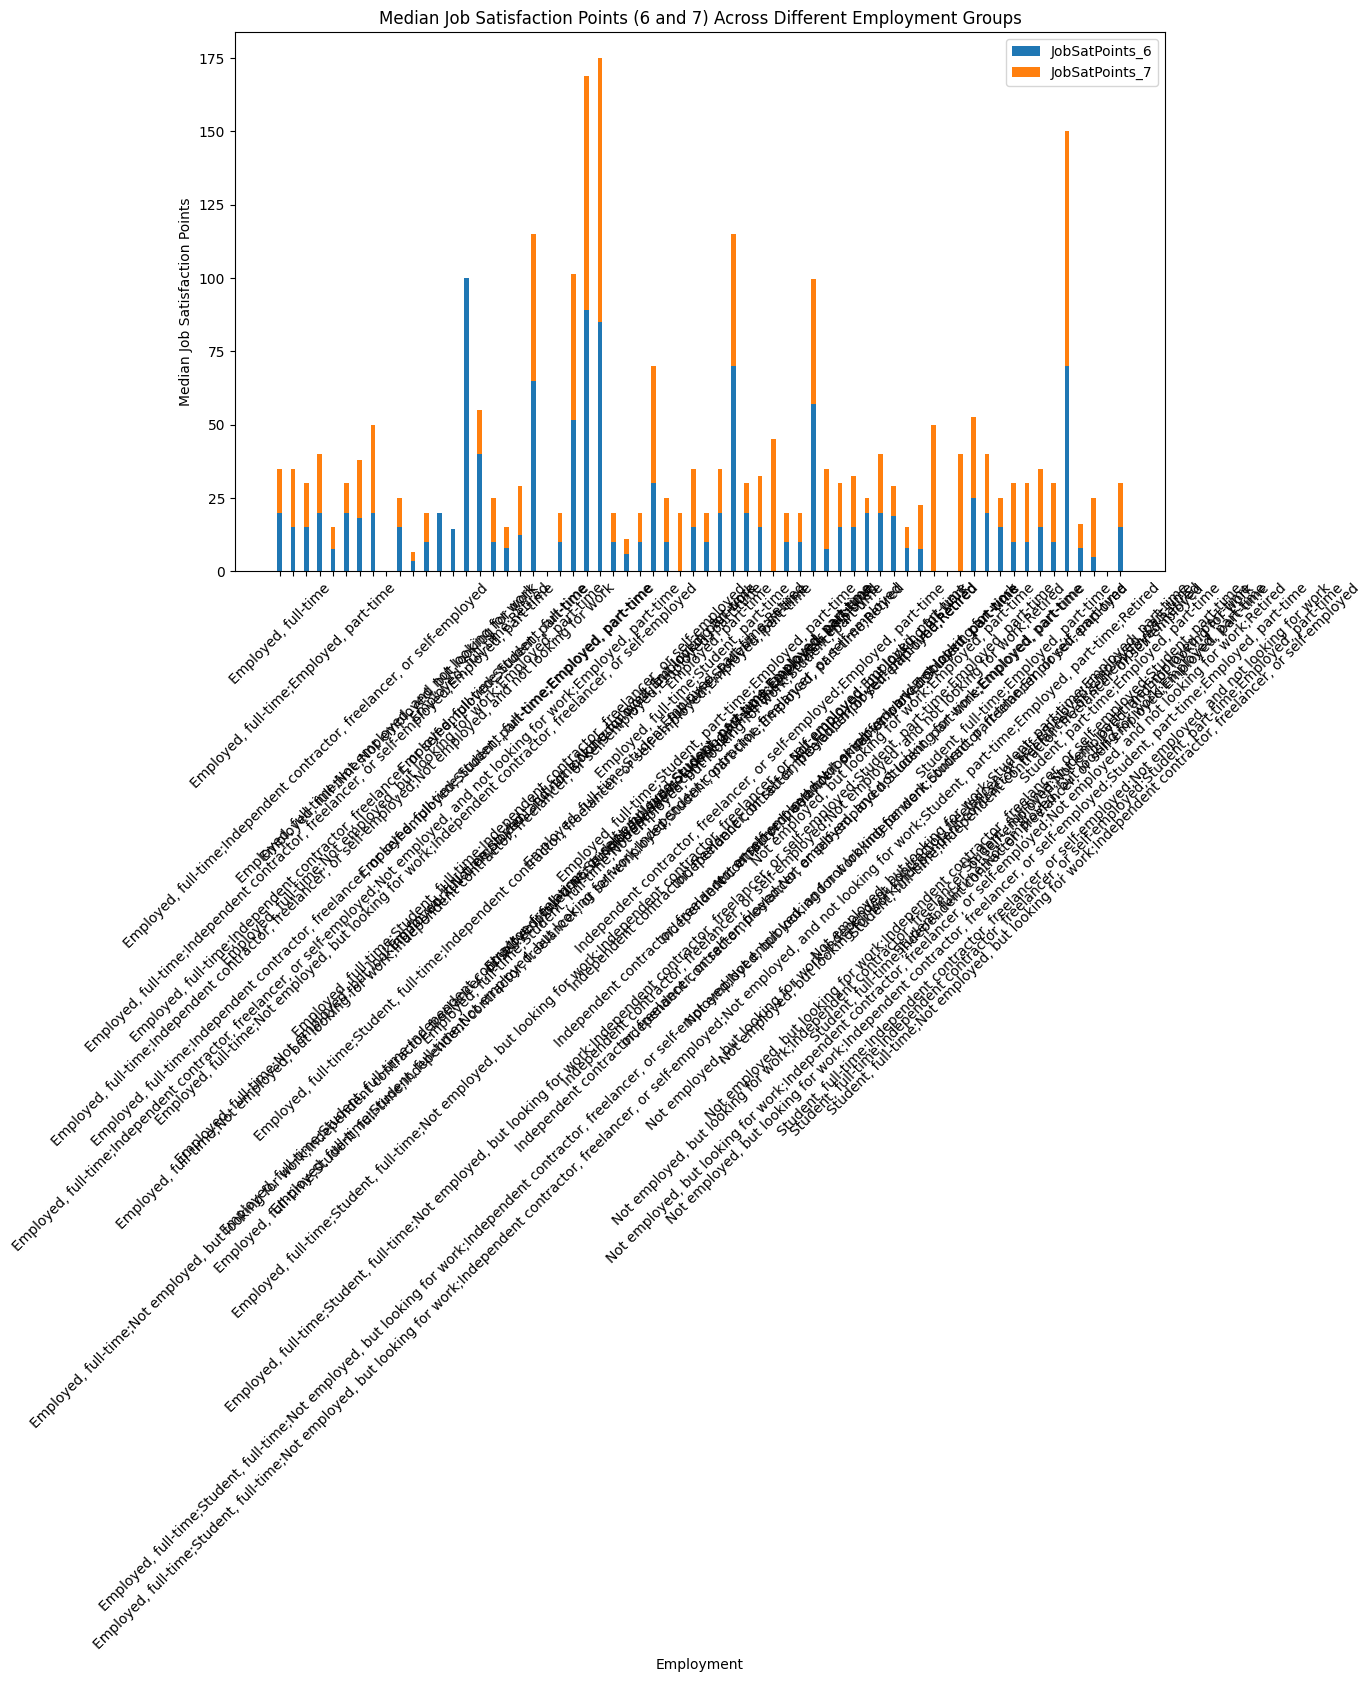

In [8]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the SQL query to select relevant data
query = """
SELECT Employment, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND JobSatPoints_7 IS NOT NULL;
"""

# Execute the SQL query and load the results into a DataFrame
df_JobSat_AgeGroup = pd.read_sql_query(query, conn)
df_JobSat_AgeGroup.head()

# Execute the SQL query and load the results into a DataFrame
df_JobSat_AgeGroup= pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Calculate the median JobSatPoints_6 and JobSatPoints_7 for each employment status
median_values = df_JobSat_AgeGroup.groupby('Employment').median()

# Create a DataFrame for visualization
median_values.reset_index(inplace=True)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.35

# Stacked bars
ax.bar(median_values['Employment'], median_values['JobSatPoints_6'], bar_width, label='JobSatPoints_6')
ax.bar(median_values['Employment'], median_values['JobSatPoints_7'], bar_width, bottom=median_values['JobSatPoints_6'], label='JobSatPoints_7')

# Add labels and title
ax.set_xlabel('Employment')
ax.set_ylabel('Median Job Satisfaction Points')
ax.set_title('Median Job Satisfaction Points (6 and 7) Across Different Employment Groups')

# Add legend
ax.legend()

# Show the plot
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout for better fit
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


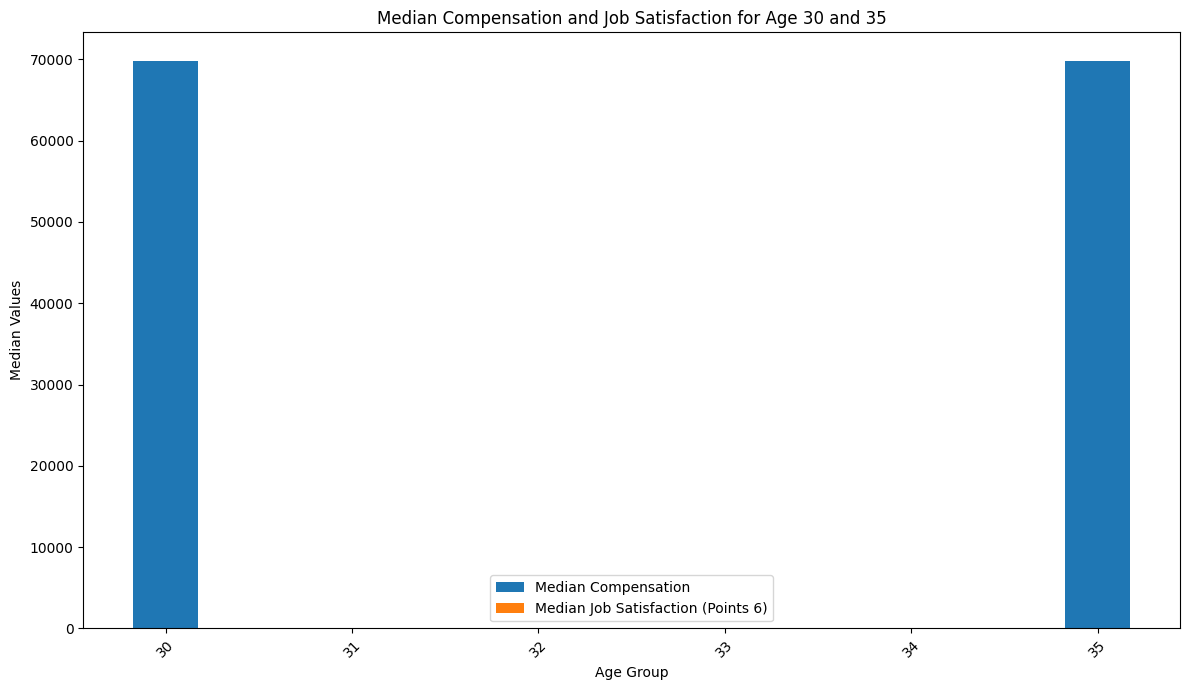

In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define a simplified SQL query to select relevant data for age 30-35
query = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age IN ('25-34 years old', '35-44 years old')
AND ConvertedCompYearly IS NOT NULL
AND JobSatPoints_6 <> 0
"""

# Execute the SQL query and load the results into a DataFrame
df_Comp_AgeGroup = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Filter to include only ages 30 and 35
def filter_age(age_range):
    age_split = age_range.split('-')
    lower_age = int(age_split[0])
    upper_age = int(age_split[1].split()[0])
    if lower_age <= 30 <= upper_age or lower_age <= 35 <= upper_age:
        return True
    return False

df_filtered = df_Comp_AgeGroup[df_Comp_AgeGroup['Age'].apply(filter_age)]

# Create separate entries for ages 30 and 35
df_filtered_30 = df_filtered.copy()
df_filtered_35 = df_filtered.copy()
df_filtered_30['Age'] = 30
df_filtered_35['Age'] = 35
df_filtered = pd.concat([df_filtered_30, df_filtered_35])

df_filtered.head

# Calculate the median values for each specific age
median_values = df_filtered.groupby('Age').median()

# Create a DataFrame for visualization
median_values.reset_index(inplace=True)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.35

# Stacked bars
compensation_bars = ax.bar(median_values['Age'], median_values['ConvertedCompYearly'], bar_width, label='Median Compensation')
satisfaction_bars = ax.bar(median_values['Age'], median_values['JobSatPoints_6'], bar_width, bottom=median_values['ConvertedCompYearly'], label='Median Job Satisfaction (Points 6)')


# Add labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Median Values')
ax.set_title('Median Compensation and Job Satisfaction for Age 30 and 35')

# Add legend
ax.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

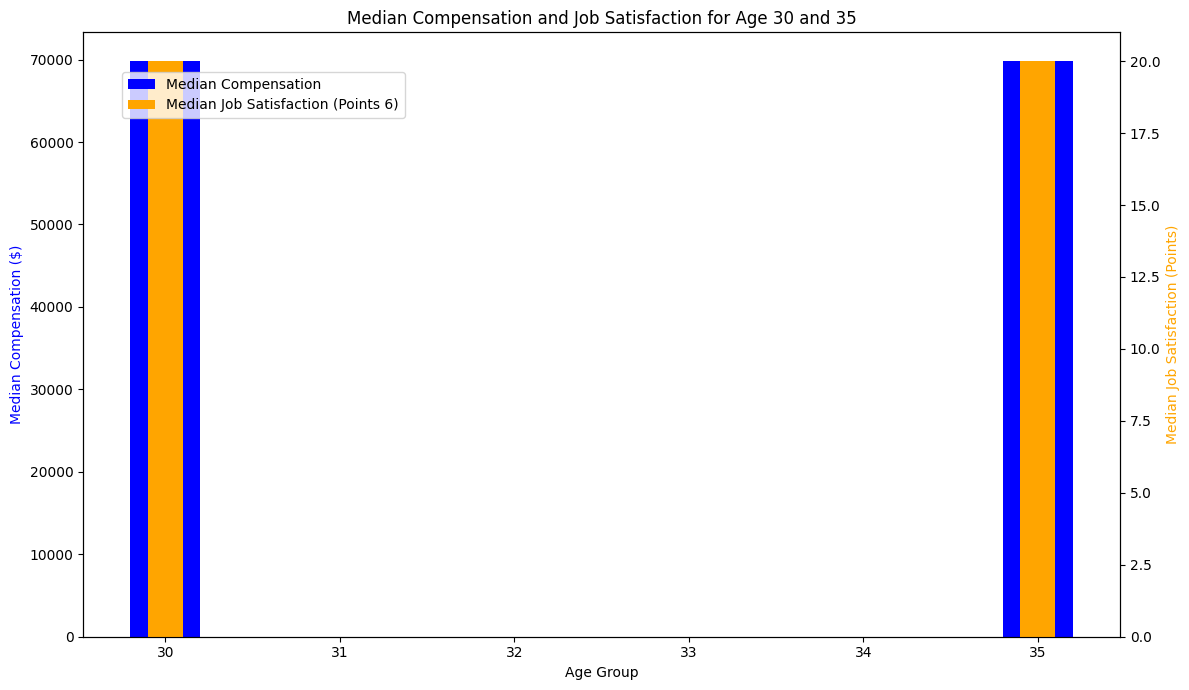

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define a simplified SQL query to select relevant data for age 30-35
query = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age IN ('25-34 years old', '35-44 years old')
AND ConvertedCompYearly IS NOT NULL
AND JobSatPoints_6 <> 0
"""

# Execute the SQL query and load the results into a DataFrame
df_Comp_AgeGroup = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Filter to include only ages 30 and 35
def filter_age(age_range):
    age_split = age_range.split('-')
    lower_age = int(age_split[0])
    upper_age = int(age_split[1].split()[0])
    if lower_age <= 30 <= upper_age or lower_age <= 35 <= upper_age:
        return True
    return False

df_filtered = df_Comp_AgeGroup[df_Comp_AgeGroup['Age'].apply(filter_age)]

# Create separate entries for ages 30 and 35
df_filtered_30 = df_filtered.copy()
df_filtered_35 = df_filtered.copy()
df_filtered_30['Age'] = 30
df_filtered_35['Age'] = 35
df_filtered = pd.concat([df_filtered_30, df_filtered_35])

# Calculate the median values for each specific age
median_values = df_filtered.groupby('Age').median()
median_values.reset_index(inplace=True)

# Create the dual-axis bar chart
fig, ax1 = plt.subplots(figsize=(12, 7))

bar_width = 0.4

# Primary axis (left) for Compensation
ax1.bar(median_values['Age'], median_values['ConvertedCompYearly'], 
        width=bar_width, label='Median Compensation', color='blue')
ax1.set_ylabel('Median Compensation ($)', color='blue')
ax1.set_xlabel('Age Group')

# Create a secondary y-axis for Job Satisfaction
ax2 = ax1.twinx()
ax2.bar(median_values['Age'], median_values['JobSatPoints_6'], 
        width=bar_width/2, label='Median Job Satisfaction (Points 6)', color='orange')
ax2.set_ylabel('Median Job Satisfaction (Points)', color='orange')

# Add title and legend
ax1.set_title('Median Compensation and Job Satisfaction for Age 30 and 35')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


Initial DataFrame:
               Age  ConvertedCompYearly  JobSat
0  18-24 years old               7322.0    10.0
1  35-44 years old              91295.0    10.0
2  25-34 years old             110000.0    10.0
3  35-44 years old             161044.0     7.0
4  45-54 years old             195000.0     5.0
Median Values:
                    ConvertedCompYearly  JobSat
Age                                            
18-24 years old                 25443.0     7.0
25-34 years old                 60000.0     7.0
35-44 years old                 85905.5     7.0
45-54 years old                101770.0     8.0
55-64 years old                118263.0     8.0
65 years or older              121668.0     8.0
Prefer not to say              133023.5     8.5
Under 18 years old               8661.0     8.0


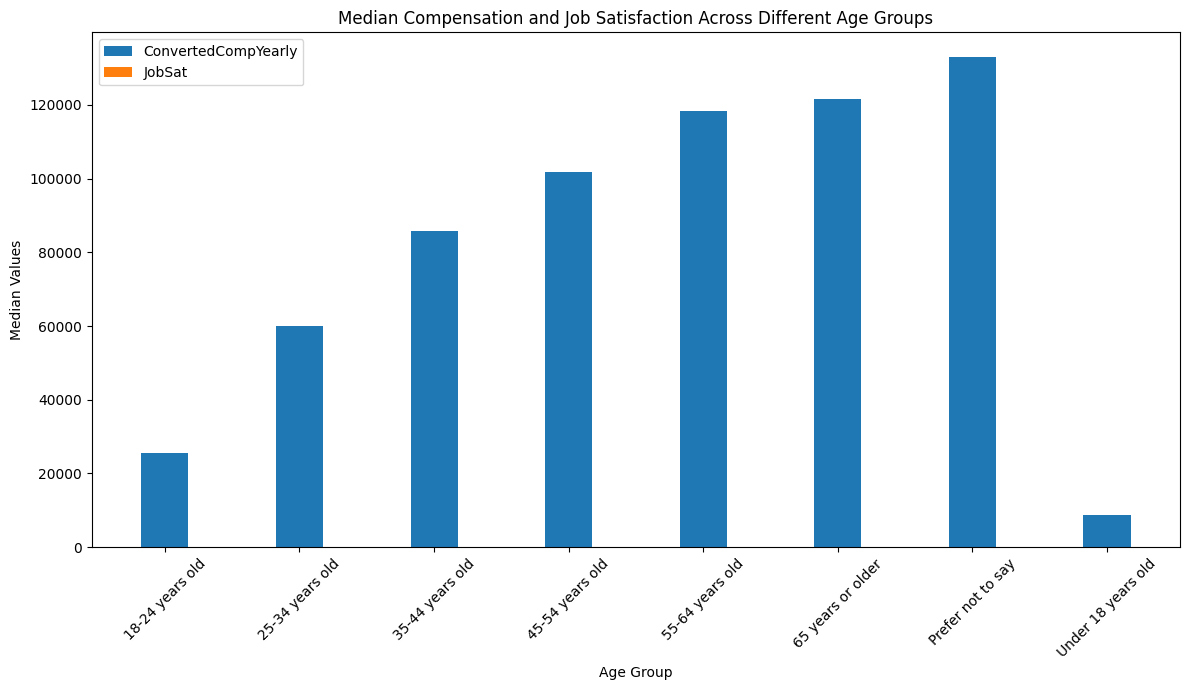

In [56]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the SQL query
query = """
SELECT Age, ConvertedCompYearly, JobSat
FROM main
WHERE JobSat IS NOT NULL AND ConvertedCompYearly IS NOT NULL;
"""

# Execute the SQL query and load the results into a DataFrame
df_mediancomp = pd.read_sql_query(query, conn)
print("Initial DataFrame:")
print(df_mediancomp.head(5))  # Debug print

# Close the database connection
conn.close()

# Calculate the median ConvertedCompYearly and JobSat for each age group
median_values = df_mediancomp.groupby('Age').median()

# Debug print to ensure median values are calculated correctly
print("Median Values:")
print(median_values)  # Debug print

# Create a DataFrame for visualization
median_values.reset_index(inplace=True)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.35

# Stacked bars
ax.bar(median_values['Age'], median_values['ConvertedCompYearly'], bar_width, label='ConvertedCompYearly')
ax.bar(median_values['Age'], median_values['JobSat'], bar_width, bottom=median_values['ConvertedCompYearly'], label='JobSat')

# Add labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Median Values')
ax.set_title('Median Compensation and Job Satisfaction Across Different Age Groups')

# Add legend
ax.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


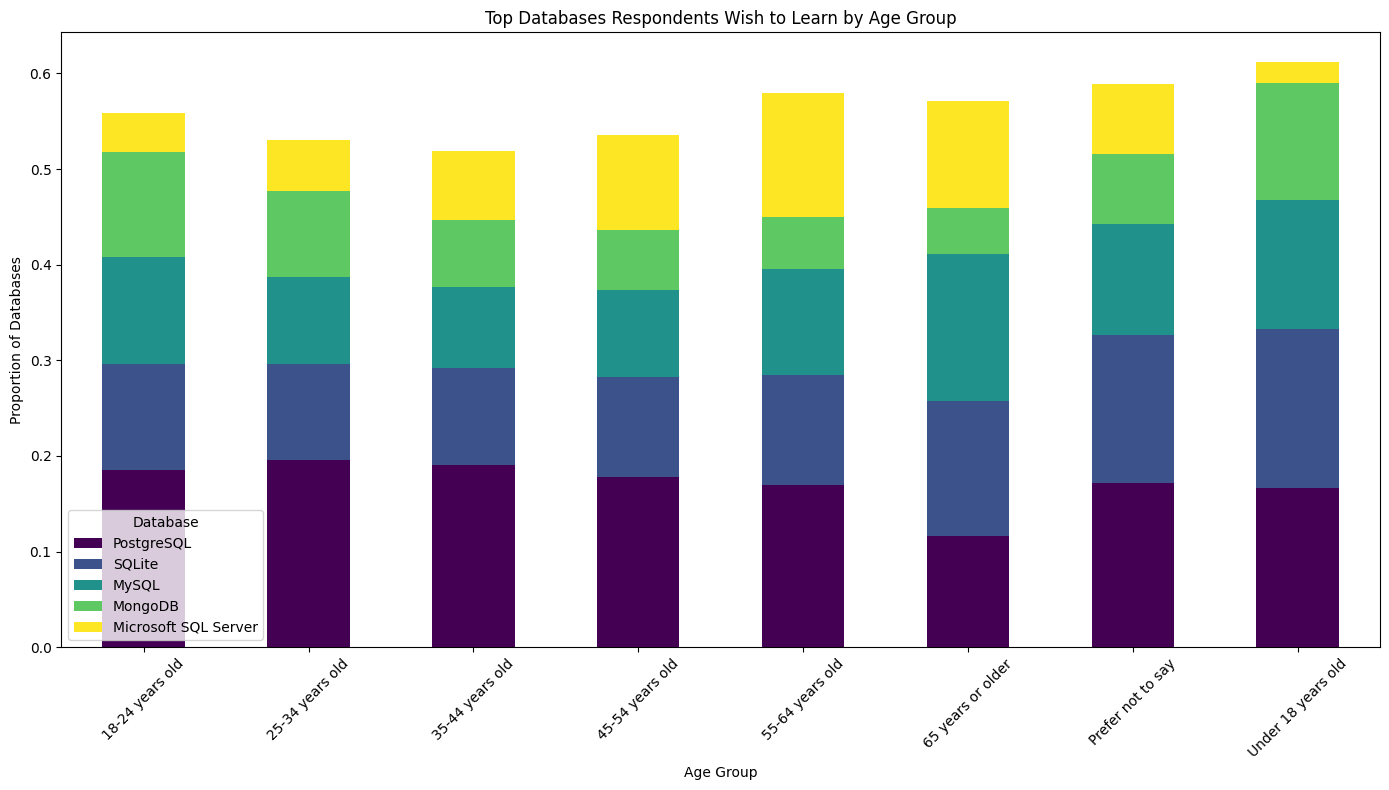

In [62]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the SQL query
query = """
SELECT Age, DatabaseWantToWorkWith
FROM main
"""

# Execute the SQL query and load the results into a DataFrame
df_preferredDB = pd.read_sql_query(query, conn)
conn.close()

# Split the database entries into separate rows
df_preferredDB['DatabaseWantToWorkWith'] = df_preferredDB['DatabaseWantToWorkWith'].str.split(';')
df_preferredDB = df_preferredDB.explode('DatabaseWantToWorkWith')

# Filter out any NaN values
df_preferredDB = df_preferredDB.dropna(subset=['DatabaseWantToWorkWith'])

# Calculate the count of each database for each age group
db_counts = df_preferredDB.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Calculate the proportion of each database for each age group
db_proportions = db_counts.div(db_counts.sum(axis=1), axis=0)

# Filter to get the top databases (you can adjust the number as needed)
top_databases = db_proportions.sum(axis=0).sort_values(ascending=False).head(5).index
db_proportions = db_proportions[top_databases]

# Create the stacked bar chart
ax = db_proportions.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Add labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Proportion of Databases')
ax.set_title('Top Databases Respondents Wish to Learn by Age Group')

# Add legend
ax.legend(title='Database')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


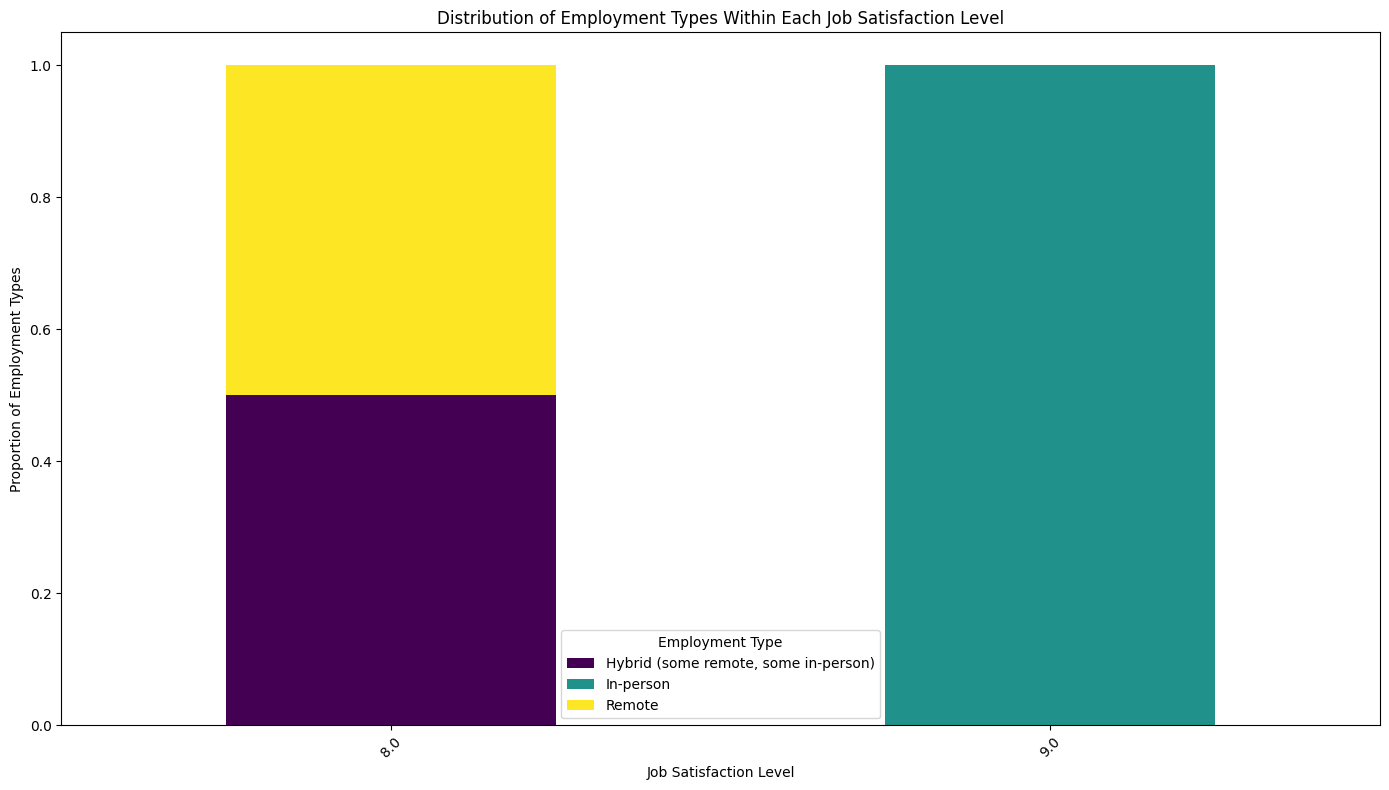

In [68]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the SQL query
query = """
SELECT JobSat, RemoteWork
FROM main
WHERE JobSat IS NOT NULL
GROUP BY 2
"""

# Execute the SQL query and load the results into a DataFrame
df_jobsat_emp = pd.read_sql_query(query, conn)
conn.close()

# Calculate the count of each employment type for each job satisfaction level
emp_counts = df_jobsat_emp.groupby(['JobSat', 'RemoteWork']).size().unstack(fill_value=0)

# Calculate the proportion of each employment type for each job satisfaction level
emp_proportions = emp_counts.div(emp_counts.sum(axis=1), axis=0)

# Create the stacked bar chart
ax = emp_proportions.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Add labels and title
ax.set_xlabel('Job Satisfaction Level')
ax.set_ylabel('Proportion of Employment Types')
ax.set_title('Distribution of Employment Types Within Each Job Satisfaction Level')

# Add legend
ax.legend(title='Employment Type')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


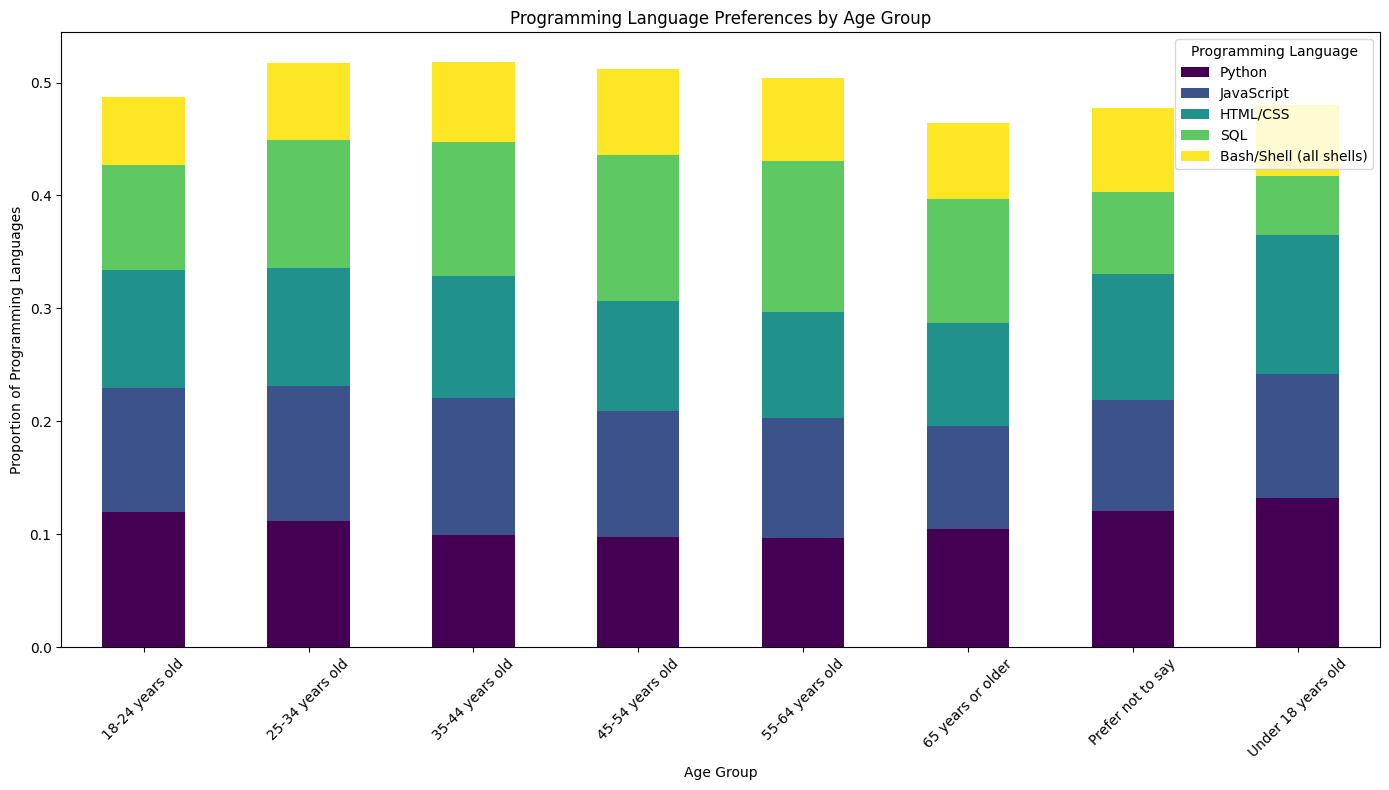

In [69]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the SQL query
query = """
SELECT Age, LanguageAdmired
FROM main
"""

# Execute the SQL query and load the results into a DataFrame
df_lang_age = pd.read_sql_query(query, conn)
conn.close()

# Split the LanguageAdmired entries into separate rows
df_lang_age['LanguageAdmired'] = df_lang_age['LanguageAdmired'].str.split(';')
df_lang_age = df_lang_age.explode('LanguageAdmired')

# Filter out any NaN values
df_lang_age = df_lang_age.dropna(subset=['LanguageAdmired'])

# Calculate the count of each programming language for each age group
lang_counts = df_lang_age.groupby(['Age', 'LanguageAdmired']).size().unstack(fill_value=0)

# Calculate the proportion of each programming language for each age group
lang_proportions = lang_counts.div(lang_counts.sum(axis=1), axis=0)

# Filter to get the top programming languages (you can adjust the number as needed)
top_languages = lang_proportions.sum(axis=0).sort_values(ascending=False).head(5).index
lang_proportions = lang_proportions[top_languages]

# Create the stacked bar chart
ax = lang_proportions.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Add labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Proportion of Programming Languages')
ax.set_title('Programming Language Preferences by Age Group')

# Add legend
ax.legend(title='Programming Language')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


/tmp/ipykernel_300/3674841281.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout for better fit


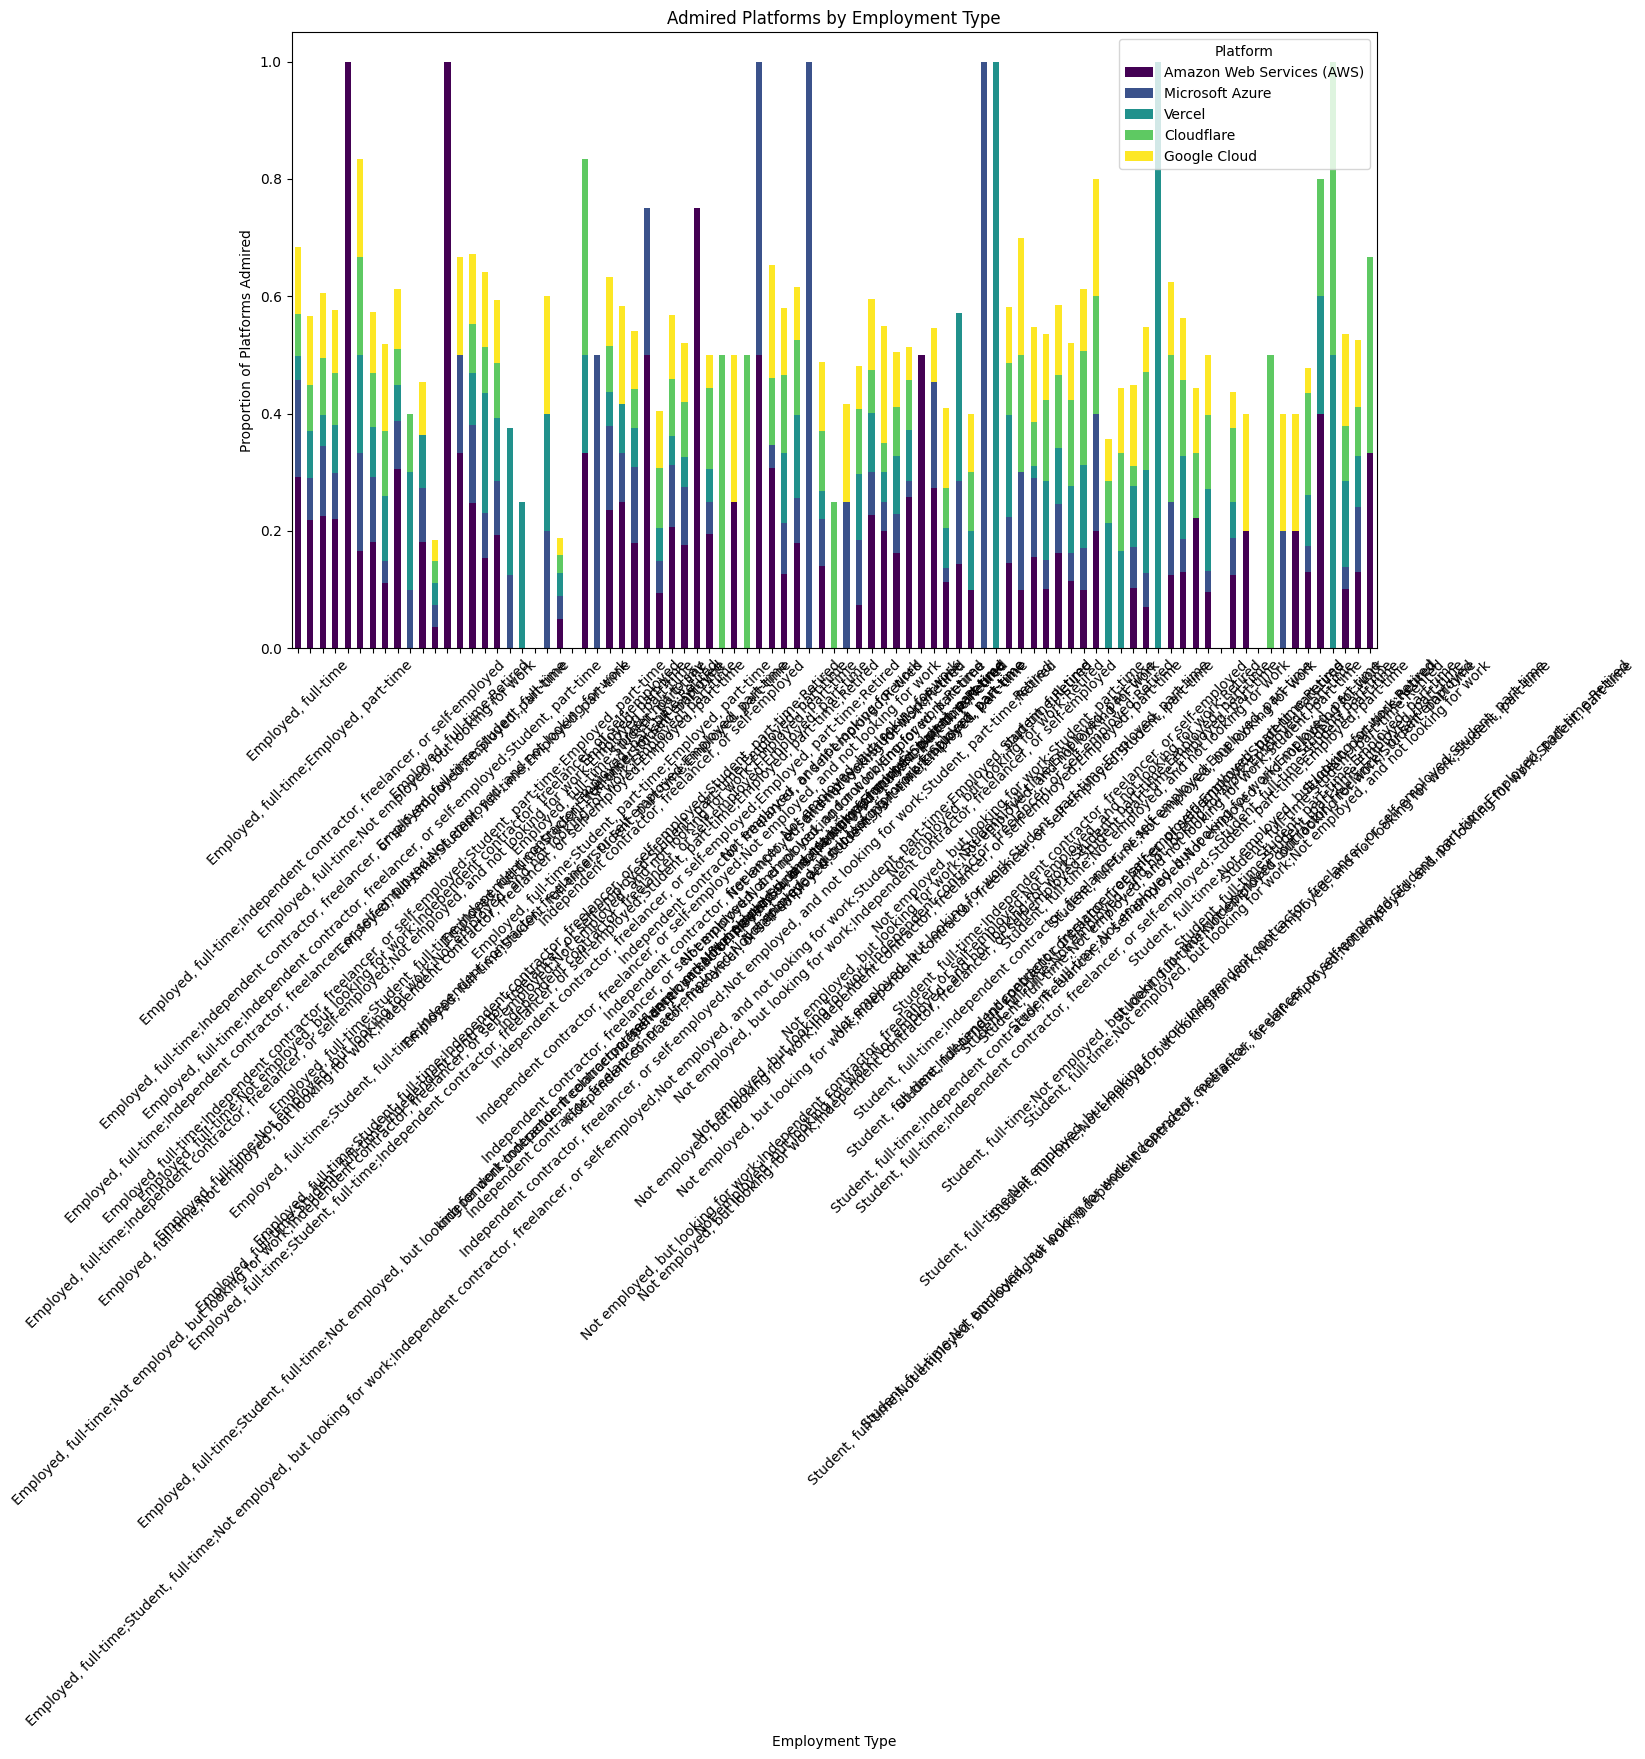

In [70]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the SQL query
query = """
SELECT Employment, PlatformAdmired
FROM main
WHERE Employment IS NOT NULL AND PlatformAdmired IS NOT NULL
"""

# Execute the SQL query and load the results into a DataFrame
df_platform_emp = pd.read_sql_query(query, conn)
conn.close()

# Split the PlatformAdmired entries into separate rows
df_platform_emp['PlatformAdmired'] = df_platform_emp['PlatformAdmired'].str.split(';')
df_platform_emp = df_platform_emp.explode('PlatformAdmired')

# Filter out any NaN values
df_platform_emp = df_platform_emp.dropna(subset=['PlatformAdmired'])

# Calculate the count of each admired platform for each employment type
platform_counts = df_platform_emp.groupby(['Employment', 'PlatformAdmired']).size().unstack(fill_value=0)

# Calculate the proportion of each admired platform for each employment type
platform_proportions = platform_counts.div(platform_counts.sum(axis=1), axis=0)

# Filter to get the top platforms (you can adjust the number as needed)
top_platforms = platform_proportions.sum(axis=0).sort_values(ascending=False).head(5).index
platform_proportions = platform_proportions[top_platforms]

# Create the stacked bar chart
ax = platform_proportions.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Add labels and title
ax.set_xlabel('Employment Type')
ax.set_ylabel('Proportion of Platforms Admired')
ax.set_title('Admired Platforms by Employment Type')

# Add legend
ax.legend(title='Platform')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()



### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
